**Farm Production.**

En este caso se realiza un analisis simple de los datos en terminos totales ( no muy especifico). Las preguntas a resolver son:

1. Realizar el preprocesamiento de datos, si existen datos faltantes excluir del analisis los mismos.
2. Observar el comportamiento anual en terminos totales tomando como referencia el año vs produccion,venta y cosecha.
3. Observar el comportamiento tomando en terminos totales tomando como referencia el tipo de cosecha vs produccion,venta y cosecha.
4. 5 maximas producciones, ventas y cosechas.
5. ¿Existe alguna correlacion entre los datos?
6. Modelo simple de regresion lineal para estimar la produccion en toneladas a partir de la siembra en hectareas.

---------------------------------------------------------------------------------------------------------------------------------------
**Farm Production.**

In this case, a simple analysis of the data is performed in aggregate terms (not very specific). The questions to be answered are:

1. Perform data preprocessing. If there are missing data, exclude them from the analysis.
2. Observe annual behavior in aggregate terms, using year versus production, sales, and harvest as references.
3. Observe behavior in aggregate terms, using crop type versus production, sales, and harvest as references.
4. Identify five maximum productions, sales, and harvests.
5. Is there any correlation between the data?
6. Simple linear regression model to estimate production in tons from planting in hectares.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/farm-produce-data-80-years/farm_production_dataset.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10273 entries, 0 to 10272
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   REF_DATE                                10273 non-null  int64  
 1   GEO                                     10273 non-null  object 
 2   Type of crop                            10272 non-null  object 
 3   Average farm price (dollars per tonne)  10243 non-null  float64
 4   Average yield (kilograms per hectare)   10246 non-null  float64
 5   Production (metric tonnes)              10245 non-null  float64
 6   Seeded area (acres)                     9873 non-null   float64
 7   Seeded area (hectares)                  9847 non-null   float64
 8   Total farm value (dollars)              10273 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 722.4+ KB
None


In [2]:
df.rename(columns={"REF_DATE":"Year","GEO":"Province",
                  "Average farm price (dollars per tonne)":"Average farm price $/T",
                  "Average yield (kilograms per hectare)":"Average yield kg/ha",
                  "Production (metric tonnes)":"Production T",
                  "Seeded area (acres)":"Seeded area ac",
                  "Seeded area (hectares)":"Seeded area ha",
                  "Total farm value (dollars)":"Total farm value $"}, inplace = True)
print(df.info())
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10273 entries, 0 to 10272
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    10273 non-null  int64  
 1   Province                10273 non-null  object 
 2   Type of crop            10272 non-null  object 
 3   Average farm price $/T  10243 non-null  float64
 4   Average yield kg/ha     10246 non-null  float64
 5   Production T            10245 non-null  float64
 6   Seeded area ac          9873 non-null   float64
 7   Seeded area ha          9847 non-null   float64
 8   Total farm value $      10273 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 722.4+ KB
None
   Year Province Type of crop  Average farm price $/T  Average yield kg/ha  \
0  1908       AB       Barley                   15.00               1585.0   
1  1908       AB     Flaxseed                   29.00                950.0   
2  190

1. Variedad de cultivos: Se cultivaron diversos productos como cebada, linaza, avena, centeno y remolacha azucarera.
2. Diferencias en precios y rendimientos: Los precios promedio por tonelada varían significativamente entre los cultivos.
3. Contribución al valor total: A pesar de tener un precio por tonelada bajo, la avena, con una alta producción (352000.0 T) y una extensa área sembrada (210000.0 ha), contribuyó significativamente al valor total de la producción agrícola ($6316).
4. Relación entre área sembrada y producción: Podemos observar la relación entre el área sembrada y la producción total para cada cultivo. Por ejemplo, la cebada tiene una gran área sembrada (53000.0 ha) y una producción considerable (84000.0 T).
5. Conversión de unidades: La tabla proporciona el área sembrada tanto en acres como en hectáreas, lo que permite realizar conversiones fácilmente (sabemos que 1 hectárea ≈ 2.47 acres).

---------------------------------------------------------------------------------------------------------------------------------------------------
1. Crop Variety: A variety of crops was grown, including barley, flaxseed, oats, rye, and sugar beet.
2. Price and Yield Differences: Average prices per ton vary significantly across crops.
3. Contribution to Total Value: Despite having a low price per ton, oats, with high production (352,000.0 tons) and a large planted area (210,000.0 hectares), contributed significantly to the total value of agricultural production ($6,316).
4. Relationship between planted area and production: We can observe the relationship between planted area and total production for each crop. For example, barley has a large planted area (53,000.0 hectares) and considerable production (84,000.0 tons).
5. Unit Conversion: The table provides the planted area in both acres and hectares, allowing for easy conversions (we know that 1 hectare ≈ 2.47 acres).

In [3]:
df.describe()

,Year,Average farm price $/T,Average yield kg/ha,Production T,Seeded area ac,Seeded area ha,Total farm value $
count,10273.000000,10243.000000,10246.000000,1.024500e+04,9.873000e+03,9.847000e+03,1.027300e+04
mean,1947.661053,59.633078,3647.442319,1.010887e+06,1.310067e+06,5.316231e+05,5.490084e+04
std,22.204519,90.920549,8068.854966,3.044681e+06,4.881387e+06,1.978043e+06,2.502413e+05
min,1908.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1929.000000,21.000000,1055.000000,8.300000e+03,1.050000e+04,4.350000e+03,3.690000e+02
50%,1948.000000,43.000000,1485.000000,7.195000e+04,8.300000e+04,3.400000e+04,3.006000e+03
75%,1967.000000,76.000000,2363.750000,5.480000e+05,5.831000e+05,2.389000e+05,1.954100e+04
max,1984.000000,6663.300000,460305.000000,1.336790e+08,3.172035e+08,1.283890e+08,4.654194e+06


**Average farm price $/T:**

Hay 10243 registros para esta variable.
El precio promedio a lo largo de todos los datos es de 59.63 por tonelada.
La desviación estándar es bastante alta (90.92), lo que indica una gran variabilidad en los precios de los diferentes cultivos y/o a lo largo del tiempo.
El precio más bajo registrado es 0.00/T (lo cual podría indicar algún tipo de dato faltante o una situación particular), y el más alto es $6663.30/T.
El 50% de los precios están por debajo de 43.00/T, mientras que el 75% están por debajo de $$76.00/T.

**Average yield kg/ha:**

Hay 10246 registros para esta variable.
El rendimiento promedio es de aproximadamente 3647.44 kg por hectárea.
La desviación estándar es considerable (8068.85 kg/ha), lo que sugiere una amplia gama de rendimientos entre los diferentes cultivos y posiblemente a lo largo de los años.
El rendimiento mínimo registrado es de 0.00 kg/ha, y el máximo es de 460305.00 kg/ha.
La mitad de los rendimientos son inferiores a 1485.00 kg/ha, y el 75% son inferiores a 2363.75 kg/ha.

**Production T:**

Hay 10245 registros para la producción en toneladas.
La producción promedio es de aproximadamente 1.01 x 10^6 toneladas (1,010,887 T). Sin embargo, la desviación estándar es muy alta (3.04 x 10^6 T), lo que indica una enorme variabilidad en la producción total, probablemente debido a las diferencias en la escala de los cultivos y las áreas sembradas.
La producción mínima es de 0.00 T y la máxima es de 1.33 x 10^8 T.
El 50% de las producciones son inferiores a 71,950 T, y el 75% son inferiores a 548,000 T.

**Seeded area ha:**

Hay 9847 registros para el área sembrada en hectáreas.
El área promedio sembrada es de aproximadamente 5.31 x 10^5 hectáreas (531,623.1 ha). La desviación estándar es también muy alta (1.97 x 10^6 ha).
El área mínima sembrada es de 0.00 hectáreas y la máxima es de 1.28 x 10^8 hectáreas.
El 50% de las áreas sembradas son inferiores a 34,000 ha, y el 75% son inferiores a 238,900 ha.

**Total farm value $:**

Hay 10273 registros para el valor total de la producción agrícola en dólares.
El valor promedio es de aproximadamente 5.49 x 10^4 (54,900.84). La desviación estándar es considerable (2.50 x 10^5), lo que indica una gran dispersión en el valor total de la producción entre los diferentes registros.
El valor mínimo es de 0.00 y el máximo es de 4.65 x 10^6.
La mitad de los valores totales son inferiores a 3,006.00, y el 75% son inferiores a $19,541.00.

-----------------------------------------------------------------------------------------------------------------------------------------------------
**Average farm price $/T:**

There are 10,243 records for this variable.
The average price across all data is 59.63 per ton.
The standard deviation is quite high (90.92), indicating significant variability in prices across different crops and/or over time.
The lowest price recorded is 0.00/T (which could indicate missing data or a specific situation), and the highest is $6,663.30/T.
Fifty percent of prices are below 43.00/T, while 75% are below 76.00/T.

**Average yield kg/ha:**

There are 10,246 records for this variable.
The average yield is approximately 3,647.44 kg per hectare.
The standard deviation is considerable (8068.85 kg/ha), suggesting a wide range of yields among different crops and possibly over the years.
The lowest recorded yield is 0.00 kg/ha, and the highest is 460,305.00 kg/ha.
Half of the yields are less than 1485.00 kg/ha, and 75% are less than 2363.75 kg/ha.

**Production T:**

There are 10,245 records for production in tons.
The average production is approximately 1.01 x 10^6 tons (1,010,887 T). However, the standard deviation is very high (3.04 x 10^6 T), indicating enormous variability in total production, likely due to differences in crop scale and planted areas. The minimum production is 0.00 T and the maximum is 1.33 x 10^8 T.
Fifty percent of production is less than 71,950 T, and 75% is less than 548,000 T.

**Seeded area ha:**

There are 9,847 records for the planted area in hectares.
The average planted area is approximately 5.31 x 10^5 hectares (531,623.1 ha). The standard deviation is also very high (1.97 x 10^6 ha).
The minimum planted area is 0.00 hectares and the maximum is 1.28 x 10^8 hectares.
Fifty percent of planted areas are less than 34,000 ha, and 75% are less than 238,900 ha.

**Total farm value $:**

There are 10,273 records for the total value of agricultural production in dollars.
The average value is approximately 5.49 x 10^4 (54,900.84). The standard deviation is considerable (2.50 x 10^5), indicating a wide dispersion in the total production value among the different records.
The minimum value is 0.00 and the maximum is 4.65 x 10^6.
Half of the total values ​​are less than 3,006.00, and 75% are less than 19,541.00.

In [4]:
df.isnull().sum()

Year                        0
Province                    0
Type of crop                1
Average farm price $/T     30
Average yield kg/ha        27
Production T               28
Seeded area ac            400
Seeded area ha            426
Total farm value $          0
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Year,Province,Type of crop,Average farm price $/T,Average yield kg/ha,Production T,Seeded area ac,Seeded area ha,Total farm value $
68,1908,ON,"Wheat, winter remaining",33.0,1585.0,430000.0,NaN,NaN,14060
170,1909,ON,"Wheat, winter remaining",37.0,1630.0,383000.0,NaN,NaN,14255
284,1910,ON,"Wheat, winter remaining",32.0,1580.0,486000.0,NaN,NaN,15362
404,1911,ON,"Wheat, winter remaining",32.0,1410.0,476000.0,NaN,NaN,15215
524,1912,ON,"Wheat, winter remaining",34.0,1390.0,413000.0,NaN,NaN,13950
...,...,...,...,...,...,...,...,...,...
10230,1984,PP,"Rye, fall remaining",96.0,1780.0,508000.0,NaN,NaN,48616
10236,1984,PP,"Wheat, winter remaining",156.0,1780.0,494300.0,NaN,NaN,77117
10251,1984,QU,"Rye, fall remaining",0.0,0.0,0.0,NaN,NaN,0
10265,1984,SK,"Rye, fall remaining",97.0,1470.0,203000.0,NaN,NaN,19691


In [6]:
df = df.dropna()
df.isnull().sum()

Year                      0
Province                  0
Type of crop              0
Average farm price $/T    0
Average yield kg/ha       0
Production T              0
Seeded area ac            0
Seeded area ha            0
Total farm value $        0
dtype: int64

In [7]:
df_resumen_total = df.groupby("Year")[["Production T","Seeded area ha","Total farm value $"]].sum()
print(df_resumen_total.head(5))

      Production T  Seeded area ha  Total farm value $
Year                                                  
1908    52499754.0      26454712.0              910003
1909    62395404.0      29642962.0             1181586
1910    49643450.0      30238450.0              840106
1911    73328000.0      35772750.0             1363764
1912    72058200.0      36625650.0             1257926


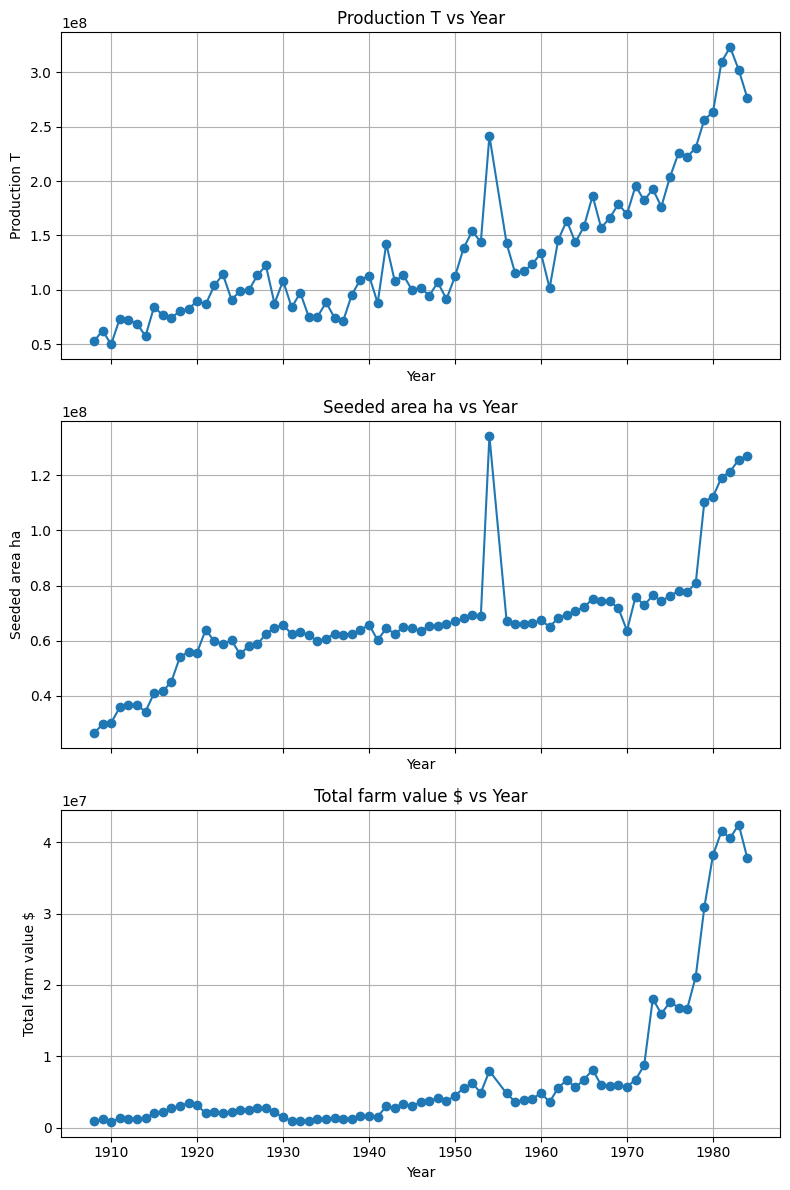

In [8]:
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(8,12),sharex=True)
columns = ['Production T', 'Seeded area ha', 'Total farm value $']
for ax,col in zip(axes,columns):
    ax.plot(df_resumen_total.index, df_resumen_total[col],marker="o")
    ax.set_title(f'{col} vs Year')
    ax.set_xlabel("Year")
    ax.set_ylabel(col)
    ax.grid(True)

plt.tight_layout()
plt.show()

**Producción T vs Year**
Tendencia general al aumento: A lo largo del período mostrado (aproximadamente desde 1908 hasta 1984), parece haber una tendencia general al aumento en la producción total.
Variabilidad interanual: A pesar de la tendencia general, existen fluctuaciones significativas de un año a otro. Esto podría deberse a diversos factores como condiciones climáticas, cambios en las áreas sembradas de diferentes cultivos, o la productividad de los cultivos específicos que se cultivaron en cada año.
Picos y valles: Se observan picos y valles pronunciados en la producción. Por ejemplo, alrededor de 1955 parece haber un pico notable, seguido de una disminución. Hacia el final del período, se aprecia un aumento considerable en la producción.

**Seeded area ha vs Year**
Tendencia al aumento, con meseta: Al igual que la producción, el área sembrada también muestra una tendencia general al aumento, aunque parece haber una especie de meseta o período de menor crecimiento entre aproximadamente 1930 y 1970.
Pico pronunciado alrededor de 1955: Al igual que en la producción, se observa un pico muy marcado en el área sembrada alrededor de 1955. Esto sugiere que este año pudo haber sido particularmente importante en términos de la extensión de tierra dedicada a la agricultura.
Aceleración del crecimiento al final del período: Hacia finales del período graficado, se aprecia un aumento significativo en el área sembrada.

**Total farm value $ vs Year**
Tendencia al aumento, con un cambio notable: El valor total de la producción muestra una tendencia al aumento, pero con un cambio bastante drástico alrededor de 1970. Antes de este punto, el valor se mantiene relativamente bajo.
Incremento significativo a partir de 1970: A partir de aproximadamente 1970, se observa un aumento muy pronunciado en el valor total de la producción. Esto podría ser resultado de un aumento en la producción, un aumento en los precios de los productos agrícolas, o una combinación de ambos.
Picos y fluctuaciones: Después del aumento significativo, se observan picos y valles, indicando variabilidad en el valor total de la producción en los años posteriores.

-------------------------------------------------------------------------------------------------------------------------------------------------------

**Production T vs. Year**
General Increasing Trend: Over the period shown (approximately from 1908 to 1984), there appears to be a general upward trend in total production.
Year-to-Year Variability: Despite the general trend, there are significant fluctuations from year to year. This could be due to various factors such as weather conditions, changes in the areas planted with different crops, or the productivity of the specific crops grown in each year.
Peaks and Troughs: Pronounced peaks and troughs in production are observed. For example, around 1955, there appears to be a notable peak, followed by a decline. Toward the end of the period, a considerable increase in production is observed.

**Seeded Area (ha) vs. Year**
Increasing Trend, with a Plateau: Like production, the seeded area also shows a general upward trend, although there appears to be a plateau or period of slower growth between approximately 1930 and 1970.
Sharp Peak Around 1955: As with production, a very sharp peak in the seeded area is observed around 1955. This suggests that this year may have been particularly important in terms of the amount of land dedicated to agriculture.
Acceleration of Growth at the End of the Period: Toward the end of the graphed period, a significant increase in the seeded area is observed.

**Total Farm Value $ vs. Year**
Increasing Trend, with a Notable Change: The total value of production shows an upward trend, but with a rather dramatic change around 1970. Before this point, the value remains relatively low. Significant increase since 1970: Starting around 1970, a very sharp increase in the total value of production is observed. This could be the result of an increase in production, an increase in agricultural product prices, or a combination of both.
Peaks and fluctuations: After the significant increase, peaks and valleys are observed, indicating variability in the total value of production in subsequent years.

In [9]:
df_resumen_total_crop = df.groupby("Type of crop")[["Production T","Seeded area ha","Total farm value $"]].sum()
print(df_resumen_total_crop.head(5))

                                     Production T  Seeded area ha  \
Type of crop                                                        
Barley                               1.015372e+09     585685200.0   
Beans, all dry (white and coloured)  6.538700e+06       5198000.0   
Buckwheat                            1.708095e+07      14979000.0   
Canola (rapeseed)                    1.084066e+08     100983700.0   
Corn for grain                       1.985560e+08      41959160.0   

                                     Total farm value $  
Type of crop                                             
Barley                                         63042796  
Beans, all dry (white and coloured)             1354467  
Buckwheat                                        852279  
Canola (rapeseed)                              26121836  
Corn for grain                                 18250459  


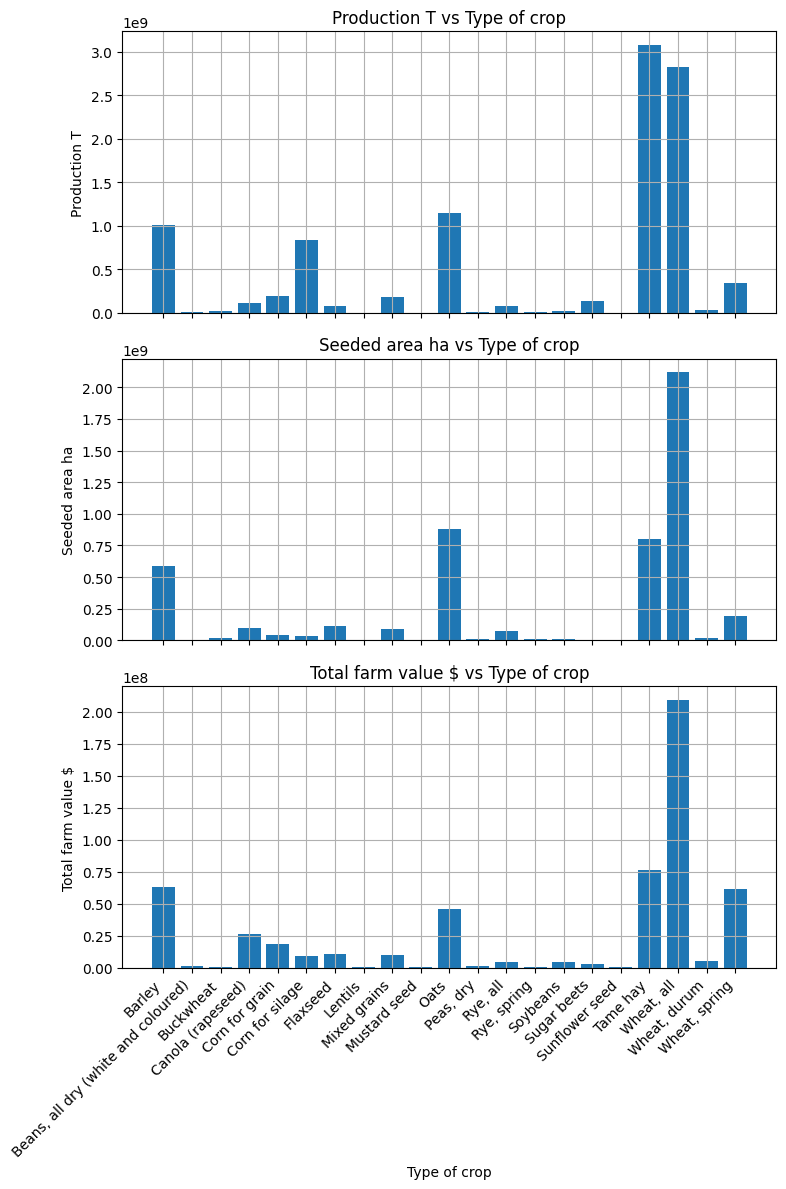

In [10]:
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(8,12),sharex=True)
columns = ['Production T', 'Seeded area ha', 'Total farm value $']
x_labels = df_resumen_total_crop.index.tolist()
x_pos = range(len(x_labels))
for ax,col in zip(axes,columns):
    ax.bar(x_pos, df_resumen_total_crop[col])
    ax.set_title(f'{col} vs Type of crop')
    ax.set_ylabel(col)
    ax.grid(True)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_labels,rotation=45,ha='right')

axes[-1].set_xlabel("Type of crop")
plt.tight_layout()
plt.show()

**Production T vs Type of crop**
Trigo (Tame hay y Wheat, all): Claramente, los cultivos de trigo (heno y en general) presentan la producción total más alta, superando significativamente a los demás.
Avena y Cebada: Les siguen en producción total la avena y la cebada, aunque a una escala considerablemente menor que el trigo.
Otros cultivos: El resto de los cultivos (como canola, linaza, lentejas, etc.) muestran niveles de producción total relativamente bajos en comparación con el trigo, la avena y la cebada.
Ausencia de algunos cultivos: Es posible que algunos de los cultivos listados en la tabla inicial no estén representados aquí si su producción total fue muy baja o nula en el período analizado.

**Seeded area ha vs Type of crop**
Trigo (Wheat, all): El trigo (en general) también ocupa el primer lugar en términos de área sembrada, con una extensión mucho mayor dedicada a su cultivo.
Avena y Cebada: La avena y la cebada también tienen áreas sembradas significativas, aunque menores que el trigo.
Similitud con la producción: En general, la distribución del área sembrada entre los cultivos parece guardar cierta relación con la producción total, aunque las proporciones exactas varían. Por ejemplo, "Tame hay" tiene una producción alta pero un área sembrada relativamente menor en comparación con "Wheat, all". Esto podría indicar un mayor rendimiento por hectárea para el heno de trigo.

**Total farm value $ vs Type of crop**
Trigo (Wheat, all): El trigo (en general) también genera el valor total más alto, lo que sugiere que, además de tener una alta producción, su precio de mercado contribuye significativamente al valor económico total.
Trigo (Tame hay): El heno de trigo también aporta un valor total considerable, aunque menor que el trigo en general.
Cebada y Avena: La cebada y la avena, a pesar de tener una producción relativamente alta, generan un valor total menor en comparación con el trigo. Esto podría indicar precios por tonelada más bajos para estos cultivos.
Otros cultivos: Algunos otros cultivos, como las "Sugar beets", a pesar de tener una producción total relativamente baja en comparación con el trigo y la avena (según el primer gráfico), podrían tener un valor total mayor que otros cultivos con mayor producción. Esto se debe probablemente a un precio por tonelada más alto.

----------------------------------------------------------------------------------------------------------------------------------------------------

**Production T vs. Type of Crop**
Wheat (all): Clearly, wheat crops (hay and wheat in general) have the highest total production, significantly exceeding the others.
Oats and Barley: Oats and barley follow in total production, although on a considerably smaller scale than wheat.
Other Crops: The remaining crops (such as canola, flaxseed, lentils, etc.) show relatively low total production levels compared to wheat, oats, and barley.
Absence of Some Crops: Some of the crops listed in the initial table may not be represented here if their total production was very low or nonexistent during the period analyzed.

**Seeded Area Ha vs. Type of Crop**
Wheat (all): Wheat (in general) also ranks first in terms of sown area, with a much larger area dedicated to its cultivation.
Oats and Barley: Oats and barley also have significant planted areas, although smaller than wheat.
Similarity with production: In general, the distribution of planted area among crops appears to bear some relationship to total production, although the exact proportions vary. For example, "Tame hay" has a high production but a relatively smaller planted area compared to "Wheat, all." This could indicate a higher yield per hectare for wheat hay.

**Total farm value $ vs. Type of crop**
Wheat (Wheat, all): Wheat (in general) also generates the highest total value, suggesting that, in addition to having high production, its market price contributes significantly to the total economic value.
Wheat (Tame hay): Wheat hay also contributes considerable total value, although less than wheat overall.
Barley and Oats: Barley and oats, despite having relatively high production, generate a lower total value compared to wheat. This could indicate lower prices per ton for these crops.
Other crops: Some other crops, such as sugar beets, despite having relatively low total production compared to wheat and oats (as shown in the first graph), could have a higher total value than other crops with higher production. This is likely due to a higher price per ton.

In [11]:
columns = ["Production T","Seeded area ha","Total farm value $"]
for col in columns:
    df_sort = df.sort_values(by=col, ascending = False)
    print(f"5 main values according to '{col}':")
    print(df_sort.head(5))

5 main values according to 'Production T':
      Year Province Type of crop  Average farm price $/T  Average yield kg/ha  \
9827  1982       CA   Wheat, all                   169.0               2130.0   
9214  1978       CA     Tame hay                    49.4               4800.0   
9989  1983       CA   Wheat, all                   176.0               1930.0   
9356  1979       CA     Tame hay                    52.8               4800.0   
9901  1982       PP   Wheat, all                   170.0               2120.0   

      Production T  Seeded area ac  Seeded area ha  Total farm value $  
9827    26714750.0      30941700.0      12521000.0             4516749  
9214    26708000.0      13737000.0       5565200.0             1320295  
9989    26464200.0      33807000.0      13680500.0             4654194  
9356    26169500.0      13454000.0       5451900.0             1382749  
9901    26127000.0      30400000.0      12302100.0             4433326  
5 main values according to 'Seed

**'Production T'**: Los cinco registros principales en términos de producción total (en toneladas) se concentran en los años finales del dataset (1978-1983) y corresponden principalmente al cultivo de trigo ("Wheat, all") en la provincia de California (CA), con una excepción de heno ("Tame hay") también en California y un registro de trigo en la provincia de PP. Las cantidades de producción son muy elevadas, superando los 26 millones de toneladas.

**'Seeded area ha'**: Los cinco registros con las mayores áreas sembradas en hectáreas también corresponden al cultivo de trigo ("Wheat, all") y se concentran en los años finales (1982-1984) en las provincias de California (CA) y PP. Las áreas sembradas son extensas, superando los 12 millones de hectáreas.

**'Total farm value $'**: Los cinco registros con el mayor valor total de la producción agrícola también corresponden al cultivo de trigo ("Wheat, all") en los años finales (1981-1983) y en las provincias de California (CA) y PP. Los valores totales superan los 4.4 millones de dólares.

-------------------------------------------------------------------------------------------------------------------------------------------------
**Production T**: The top five records in terms of total production (in tons) are concentrated in the final years of the dataset (1978-1983) and correspond primarily to wheat ("Wheat, all") in the province of California (CA), with one exception for hay ("Tame hay") also in California and one wheat record in the province of PP. Production quantities are very high, exceeding 26 million tons.

**Seeded area ha**: The five records with the largest planted areas in hectares also correspond to wheat ("Wheat, all") and are concentrated in the final years (1982-1984) in the provinces of California (CA) and PP. The planted areas are extensive, exceeding 12 million hectares.

**Total farm value**: The five records with the highest total farm production values ​​also correspond to wheat ("Wheat, all") in the final years (1981-1983) and in the provinces of California (CA) and PP. The total values ​​exceed $4.4 million.

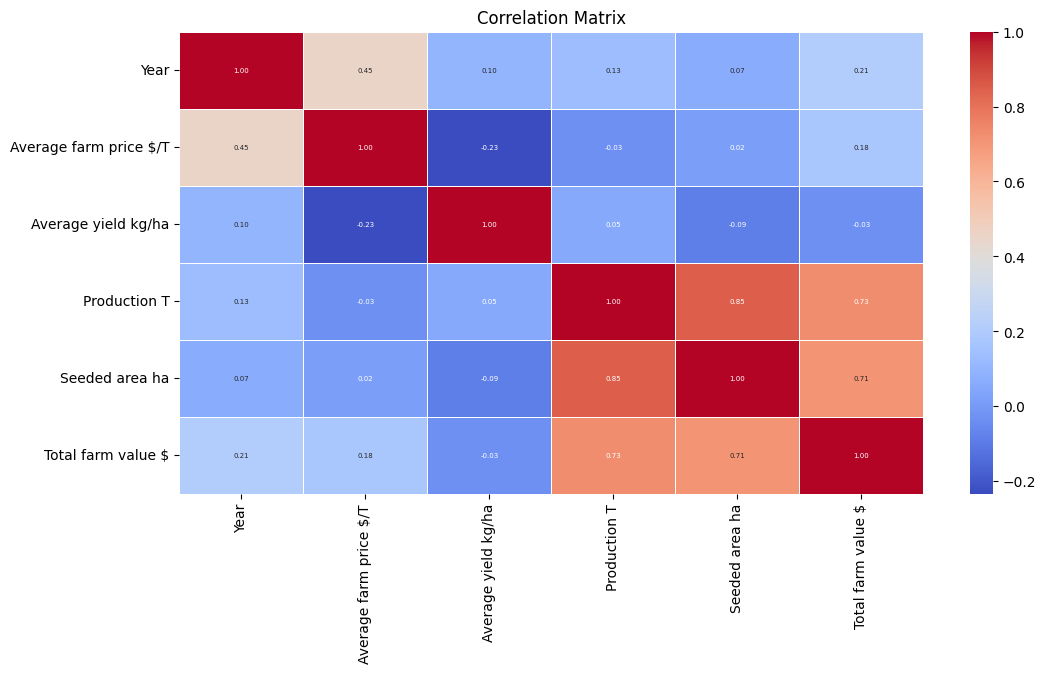

In [12]:
import seaborn as sns

df_corr = df.drop(columns=["Province","Type of crop","Seeded area ac"])
correlation_matrix = df_corr.corr(method='pearson')

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths = 0.5,annot_kws={"size": 5})
plt.title("Correlation Matrix")
plt.show()

1. El tiempo (Year) muestra una tendencia positiva con la mayoría de las variables, especialmente con el valor total de la producción.
2. La producción total, el área sembrada y el valor total de la producción muestran correlaciones positivas fuertes entre sí. Esto es intuitivo, ya que una mayor área sembrada generalmente lleva a una mayor producción, y una mayor producción contribuye a un mayor valor total.
3. El precio promedio por tonelada no muestra correlaciones fuertes con la producción o el área sembrada, pero tiene una correlación positiva débil con el valor total.
4. El rendimiento promedio por hectárea muestra una correlación positiva moderada con la producción total y una correlación débil a moderada con el valor total.

--------------------------------------------------------------------------------------------------------------------------------------------------

1. Time (Year) shows a positive trend with most variables, especially with the total value of production.
2. Total production, planted area, and total value of production show strong positive correlations with each other. This is intuitive, as larger planted area generally leads to higher production, and higher production contributes to higher total value.
3. Average price per ton shows no strong correlation with production or planted area, but has a weak positive correlation with total value.
4. Average yield per hectare shows a moderate positive correlation with total production and a weak to moderate correlation with total value.

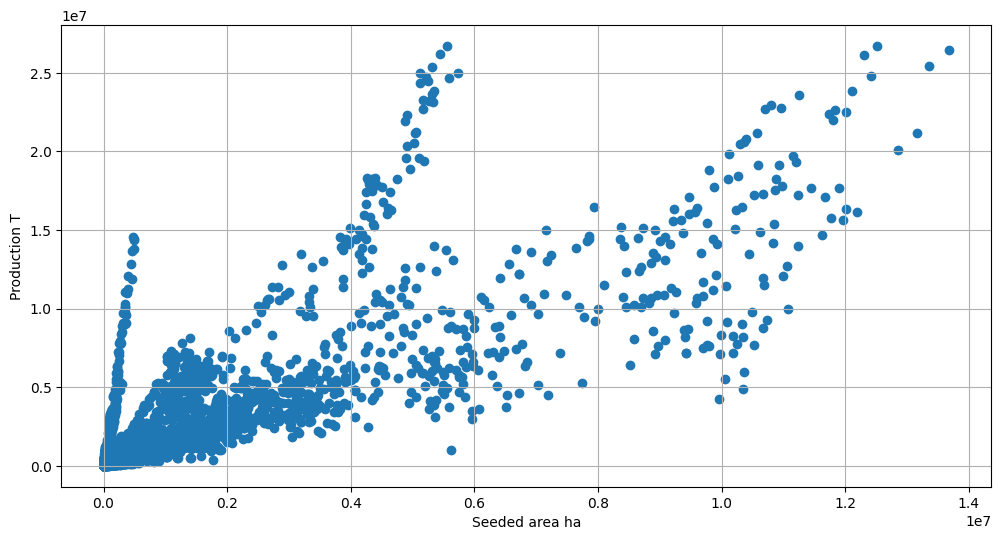

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(df["Seeded area ha"],df["Production T"])
plt.xlabel("Seeded area ha")
plt.ylabel("Production T")
plt.grid(True)
plt.show()

Este gráfico de dispersión visualiza la fuerte relación positiva entre el área sembrada y la producción total que ya habíamos identificado a través del coeficiente de correlación. Sin embargo, también subraya que esta relación no es perfecta y que la producción total está influenciada por otros factores además del tamaño del área cultivada. La dispersión de los puntos, especialmente para áreas sembradas más grandes, sugiere la variabilidad en los rendimientos y los tipos de cultivos dentro del conjunto de datos.

-------------------------------------------------------------------------------------------------------------------------------------------------

This scatter plot visualizes the strong positive relationship between planted area and total production that we had already identified through the correlation coefficient. However, it also underscores that this relationship is not perfect and that total production is influenced by factors other than the size of the planted area. The scatter plot, especially for larger planted areas, suggests variability in yields and crop types within the data set.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X=df[["Seeded area ha"]]
y = df["Production T"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de error y los coeficientes
print("Métricas de Error en el Conjunto de Prueba:")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R-squared): {r2:.2f}")

print("\nCoeficientes del Modelo:")
print(f"Coeficiente (pendiente): {model.coef_[0]:.2f}")
print(f"Intercepto: {model.intercept_:.2f}")

# Ejemplo de predicción (usando el modelo entrenado)
nueva_area = pd.DataFrame({'Seeded area ha': [100]})
prediccion = model.predict(nueva_area)
print(f"\nProducción estimada para un área sembrada de 100 hectáreas: {prediccion[0]:.2f} Toneladas")

Métricas de Error en el Conjunto de Prueba:
Error Cuadrático Medio (MSE): 1738866404585.41
Coeficiente de Determinación (R-squared): 0.74

Coeficientes del Modelo:
Coeficiente (pendiente): 1.58
Intercepto: 213655.98

Producción estimada para un área sembrada de 100 hectáreas: 213814.09 Toneladas


El modelo muestra una capacidad razonable para explicar la variabilidad en la producción total basándose en el área sembrada (R-squared de 0.74). Sin embargo, el Error Cuadrático Medio (MSE) es bastante alto, lo que sugiere que las predicciones individuales pueden tener un error considerable. El coeficiente de la pendiente indica un aumento esperado en la producción por cada hectárea adicional sembrada, y el intercepto representa la producción estimada con un área sembrada de cero. La predicción para 100 hectáreas nos da un valor específico según el modelo, pero la incertidumbre asociada con el MSE debe tenerse en cuenta al interpretar esta predicción.

Para mejorar este modelo, se podrían considerar la inclusión de otras variables predictoras (como el tipo de cultivo, las condiciones climáticas, el uso de fertilizantes, etc.) que podrían explicar la variabilidad restante en la producción total.

-------------------------------------------------------------------------------------------------------------------------------------------------

The model shows a reasonable ability to explain the variability in total production based on planted area (R-squared of 0.74). However, the Mean Square Error (MSE) is quite high, suggesting that individual predictions may have considerable error. The slope coefficient indicates an expected increase in production for each additional hectare planted, and the intercept represents the estimated production with a planted area of ​​zero. The prediction for 100 hectares gives us a specific value according to the model, but the uncertainty associated with the MSE must be taken into account when interpreting this prediction.

To improve this model, the inclusion of other predictor variables (such as crop type, weather conditions, fertilizer use, etc.) that could explain the remaining variability in total production could be considered.

In [15]:
df_log = df[(df['Seeded area ha'] > 0) & (df['Production T'] > 0)]
df_log['log_seeded_area'] = np.log(df_log['Seeded area ha'])
df_log['log_production'] = np.log(df_log['Production T'])
# Definir las variables para el modelo
X_log = df_log[['log_seeded_area']]
y_log = df_log['log_production']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

# Imprimir las métricas de error y los coeficientes del modelo transformado
print("Métricas de Error en el Conjunto de Prueba (Modelo Log-Log):")
print(f"Error Cuadrático Medio (MSE) en espacio logarítmico: {mse_log:.2f}")
print(f"Coeficiente de Determinación (R-squared): {r2_log:.2f}")

print("\nCoeficientes del Modelo (Espacio Logarítmico):")
print(f"Coeficiente (pendiente): {model_log.coef_[0]:.2f}")
print(f"Intercepto: {model_log.intercept_:.2f}")

# Ejemplo de predicción (en el espacio original) para un área sembrada de 100 hectáreas
nueva_area = pd.DataFrame({'Seeded area ha': [13680500]})
log_nueva_area = np.log(nueva_area['Seeded area ha'])
prediccion_log = model_log.predict(pd.DataFrame({'log_seeded_area': log_nueva_area}))
prediccion_original = np.exp(prediccion_log[0])
print(f"\nProducción estimada (modelo log-log) para un área sembrada de hectáreas: {prediccion_original:.2f} Toneladas")


Métricas de Error en el Conjunto de Prueba (Modelo Log-Log):
Error Cuadrático Medio (MSE) en espacio logarítmico: 0.91
Coeficiente de Determinación (R-squared): 0.87

Coeficientes del Modelo (Espacio Logarítmico):
Coeficiente (pendiente): 0.97
Intercepto: 0.98

Producción estimada (modelo log-log) para un área sembrada de hectáreas: 23102316.36 Toneladas


/tmp/ipykernel_13/292400115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log['log_seeded_area'] = np.log(df_log['Seeded area ha'])
/tmp/ipykernel_13/292400115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log['log_production'] = np.log(df_log['Production T'])


**Métricas de Error en el Conjunto de Prueba (Modelo Log-Log):**

Error Cuadrático Medio (MSE) en espacio logarítmico: 0.91

Este MSE se calcula sobre los valores logarítmicos de la producción. Compararlo directamente con el MSE del modelo lineal anterior (que estaba en la escala original de la producción) no es apropiado.
Un MSE de 0.91 en el espacio logarítmico sugiere que, en promedio, la diferencia al cuadrado entre el logaritmo de la producción real y el logaritmo de la producción predicha es de 0.91. Interpretar si este valor es "bueno" o "malo" depende del contexto y de la escala de los logaritmos de la producción. Generalmente, un valor menor indica un mejor ajuste del modelo a los datos transformados.

Coeficiente de Determinación (R-squared): 0.87

Este R-squared indica que el 87% de la variabilidad en el logaritmo de la producción puede ser explicado por el logaritmo del área sembrada utilizando este modelo log-log.
Un R-squared de 0.87 es mejor que el R-squared de 0.74 obtenido con el modelo lineal simple. Esto sugiere que el modelo log-log se ajusta mejor a la relación entre el área sembrada y la producción después de aplicar la transformación logarítmica. La transformación logarítmica a menudo es útil cuando la relación entre las variables no es lineal y cuando la varianza de los errores no es constante.

Coeficientes del Modelo (Espacio Logarítmico):

Coeficiente (pendiente): 0.97

En un modelo log-log, el coeficiente (pendiente) se interpreta como la elasticidad. Indica que un aumento del 1% en el área sembrada está asociado con un aumento aproximado del 0.97% en la producción total.
Un coeficiente cercano a 1 sugiere una relación casi proporcional en términos porcentuales entre el área sembrada y la producción.

--------------------------------------------------------------------------------------------------------------------------------------------------
**Error Metrics on the Test Set (Log-Log Model):**

Mean Squared Error (MSE) in log space: 0.91

This MSE is calculated on the log output values. Directly comparing it to the MSE of the previous linear model (which was on the original output scale) is not appropriate.
An MSE of 0.91 in log space suggests that, on average, the squared difference between the log of actual output and the log of predicted output is 0.91. Interpreting whether this value is "good" or "bad" depends on the context and the scale of the log output. Generally, a lower value indicates a better model fit to the transformed data. 

Coefficient of Determination (R-squared): 0.87

This R-squared indicates that 87% of the variability in the logarithm of production can be explained by the logarithm of the planted area using this log-log model.
An R-squared of 0.87 is better than the R-squared of 0.74 obtained with the simple linear model. This suggests that the log-log model better fits the relationship between planted area and production after applying the log transformation. The log transformation is often useful when the relationship between variables is nonlinear and when the error variance is not constant.

Model Coefficients (Log Space):

Coefficient (slope): 0.97

In a log-log model, the coefficient (slope) is interpreted as the elasticity. It indicates that a 1% increase in planted area is associated with an approximate 0.97% increase in total production.
A coefficient close to 1 suggests a nearly proportional relationship in percentage terms between planted area and production.